In [1]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

# Import libraries for OCR 
import cv2

In [2]:
image = cv2.imread('D:\\Study\\DataScience\\OpenCV\\OCR\\gasmeter.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

## Mask for red colour

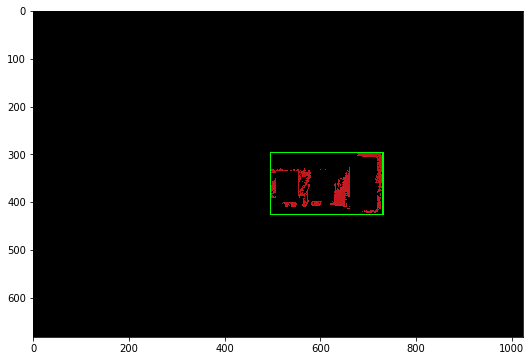

In [3]:
lower_red = np.array([170, 20, 20], np.uint8)
upper_red = np.array([220, 40, 40], np.uint8)
mask_red = cv2.inRange(image, lower_red, upper_red)
red = cv2.bitwise_and(image, image, mask=mask_red)

edges_red = cv2.Canny(red, 127, 255, apertureSize=3)

contours_red, hierarchy = cv2.findContours(edges_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


boxes_red = []
for contour in contours_red:
    x,y,w,h = cv2.boundingRect(contour)
    if cv2.contourArea(contour) < 5000:
        #cv2.rectangle(red, (x, y), (x + w, y + h), (0, 255, 0), 2)
        boxes_red.append([x,y, x+w,y+h])
        
boxes_red = np.asarray(boxes_red)
left = np.min(boxes_red[:,0])
top = np.min(boxes_red[:,1])
right = np.max(boxes_red[:,2])
bottom = np.max(boxes_red[:,3])


cv2.rectangle(red, (left,top), (right,bottom), (0, 255, 0), 2)
    
plt.figure(figsize=(12,6))
plt.imshow(red)

## Mask for black colour

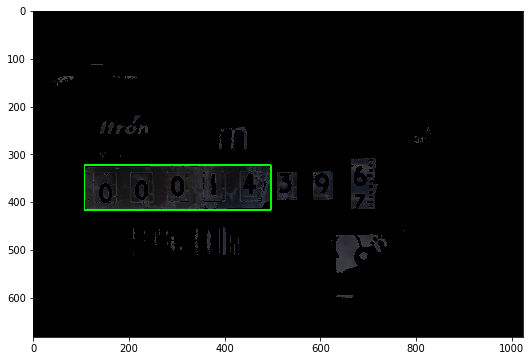

In [4]:
lower_black = np.array([0, 0, 0], np.uint8)
upper_black = np.array([70, 70, 70], np.uint8)
mask_black = cv2.inRange(image, lower_black, upper_black)
black = cv2.bitwise_and(image, image, mask=mask_black)

edges_black = cv2.Canny(black, 127, 255, apertureSize=3)

contours_black, hierarchy = cv2.findContours(edges_black, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

boxes_black = []
for contour in contours_black:
    x,y,w,h = cv2.boundingRect(contour)
    if cv2.contourArea(contour) > 5000:
        #cv2.rectangle(black, (x, y), (x + w, y + h), (0, 255, 0), 2)
        boxes_black.append([x,y, x+w,y+h])

        
boxes_black = np.asarray(boxes_black)
left = np.min(boxes_black[:,0])
top = np.min(boxes_black[:,1])
right = np.max(boxes_black[:,2])
bottom = np.max(boxes_black[:,3])

cv2.rectangle(black, (left,top), (right,bottom), (0, 255, 0), 2)

plt.figure(figsize=(12,6))
plt.imshow(black)

## Combining two ROIs to get area covering all the digits

In [5]:
digit_box = [*boxes_black, *boxes_red] 

digit_box = np.asarray(digit_box)
left_digitbox = np.min(digit_box[:,0])
top_digitbox = np.min(digit_box[:,1])
right_digitbox = np.max(digit_box[:,2])
bottom_digitbox = np.max(digit_box[:,3])

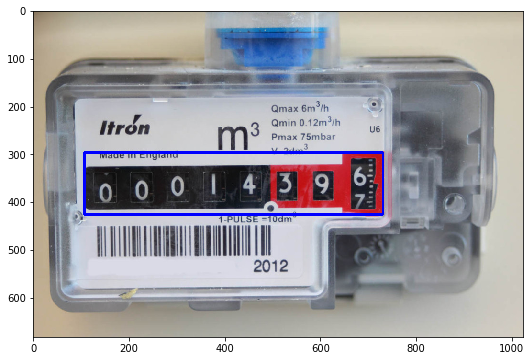

In [8]:
cv2.rectangle(image, (left_digitbox, top_digitbox), (right_digitbox, bottom_digitbox), (0, 0, 255), 4)

plt.figure(figsize=(12,6))
plt.imshow(image)

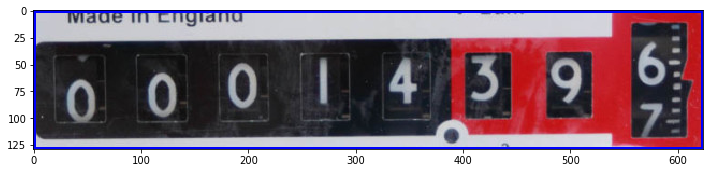

In [10]:
# Extract the image covering the meter readings
extracted_image = image[top_digitbox:bottom_digitbox, left_digitbox:right_digitbox]

plt.figure(figsize=(12,6))
plt.imshow(extracted_image)